# Лабораторная работа № 1

### Краткое описание

В качестве датасета для лабораторной работы был выбран набор из 10000 треков со Spotify, с дополнительной информацией по каждому (например: громкость, длительность, ритм, "танцевальность" и т.д.).

### Источник данных

Источник данных - https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes. Автор пишет, что данные были получены через Spotify API, что свиделетьствует об их реальности.

### Атрибуты

- название трека (trackName) string

- исполнитель (artistName) string
    
- жанр (genre) string

- длительность воспроизведения трека (msPlayed) int

- danceability (танцевальность) float: Мера от 0.0 до 1.0 того, насколько танцевальным является трек.

- energy (энергичность) float: Мера от 0.0 до 1.0 того, насколько энергичным является трек.

- key (тональность) int: Тональность трека. Целые числа сопоставляются с тонами с использованием Pitch Class notation. Например, 0 = C, 1 = C♯/D♭, 2 = D и т.д.

- loudness (громкость) float: Громкость трека в децибелах.

- mode (лад) int: Лад трека (Минор = 0, Мажор = 1)

- speachiness (речитатив) float: Мера от 0.0 до 1.0 того, насколько много человеческой речи содержится в треке.

- acousticness (акустичность) float: Мера от 0.0 до 1.0 того, насколько акустическим является трек.

- instrumentalness (инструментальность) float: Мера от 0.0 до 1.0, насколько инструментальным является трек

- liveness (живой звук) float: Мера от 0.0 до 1.0 того, является ли запись трека "живой" (например, запись с концерта)

- valence (позитивность) float: Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком.

- tempo (ритм) float: Среднее число BPM трека.

- тип трека (type) string

- идентифактор трека (id) string

- uri трек (uri) string

- cсылка на конец трека (track_href) string

- ссылка на трек (analysis_url) string

- duration_ms (длительность) float: Длительность трека в миллисекундах.

- time_signature (размер такта) float: Условное обозначение, указывающее, сколько долей содержится в каждом такте 
  

### Анализ данных

Сперва откроем файл и убедимся, что все атрибуты присутствуют

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn

file = pd.read_csv("./dataset/spotify.csv")
file.head()

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0


Проверим метаинформацию о датасете и количество пустых полей

In [5]:
file.info()
file.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10080 non-null  object 
 1   artistName        10080 non-null  object 
 2   msPlayed          10080 non-null  int64  
 3   genre             8580 non-null   object 
 4   danceability      9530 non-null   float64
 5   energy            9530 non-null   float64
 6   key               9530 non-null   float64
 7   loudness          9530 non-null   float64
 8   mode              9530 non-null   float64
 9   speechiness       9530 non-null   float64
 10  acousticness      9530 non-null   float64
 11  instrumentalness  9530 non-null   float64
 12  liveness          9530 non-null   float64
 13  valence           9530 non-null   float64
 14  tempo             9530 non-null   float64
 15  type              9530 non-null   object 
 16  id                9530 non-null   object

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

Почистим датасет от пустых значений (их достаточно мало, чтобы принебречь)

In [6]:
file = file.dropna()

### Найдем числовые характеристики по атрибутам

Определим среднее и СКО ключевых числовых атрибутов:

In [7]:
scalar_attributes = [file['danceability'],
                     file['energy'],
                     file['loudness'],
                     file['speechiness'],
                     file['acousticness'],
                     file['instrumentalness'],
                     file['liveness'],
                     file['valence'],
                     file['tempo'],
                     file['duration_ms']]

for attr in scalar_attributes:
    print(f"{attr.name} mean = {np.mean(attr)}")
    print(f"{attr.name} STD = {np.std(attr)}")
    print("\n")

danceability mean = 0.6018286946386946
danceability STD = 0.1585010528136999


energy mean = 0.5668437039627038
energy STD = 0.24163920767661792


loudness mean = -8.577849184149184
loudness STD = 5.328404312751147


speechiness mean = 0.07832058275058275
speechiness STD = 0.07853044065933867


acousticness mean = 0.3578384812027972
acousticness STD = 0.33274916927313675


instrumentalness mean = 0.14934152897902098
instrumentalness STD = 0.3097525646160134


liveness mean = 0.17466834498834496
liveness STD = 0.13089399113039588


valence mean = 0.4356031468531468
valence STD = 0.24275134870436793


tempo mean = 119.14435034965035
tempo STD = 28.9654330803224


duration_ms mean = 203788.38088578088
duration_ms STD = 73392.00883604829




Построим гистограммы распределения значений

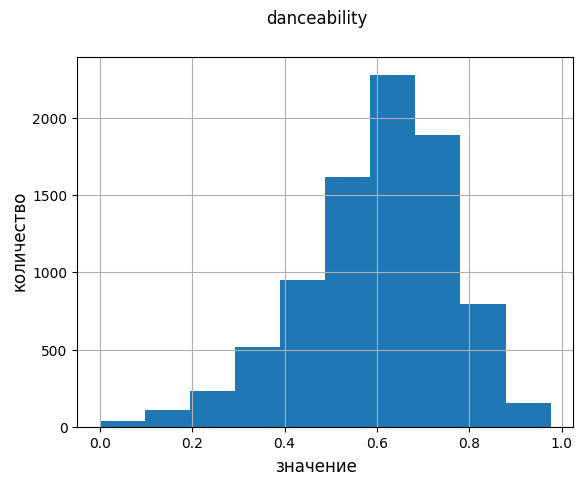

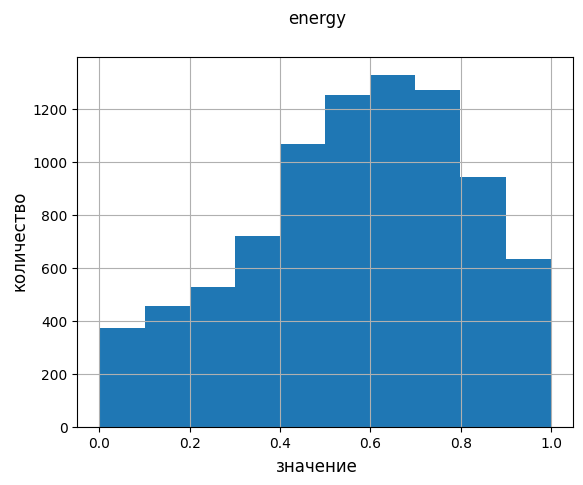

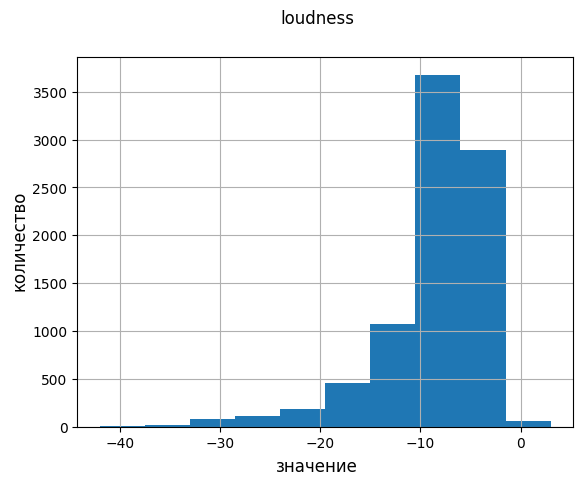

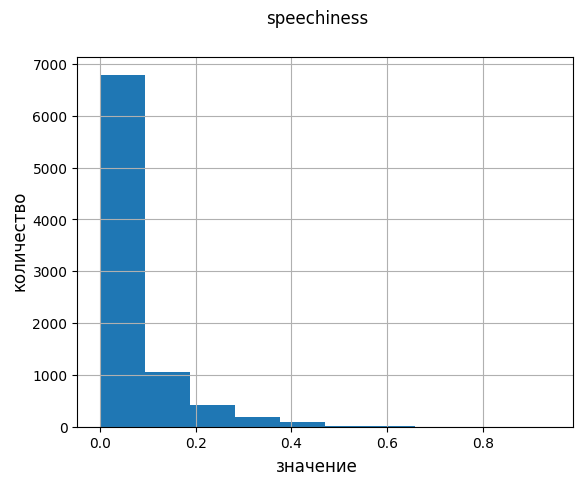

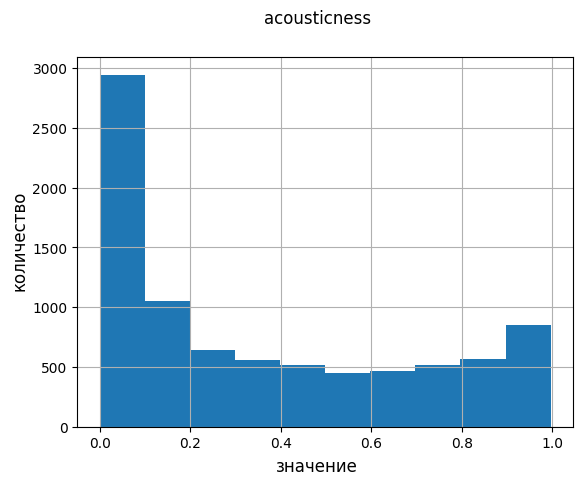

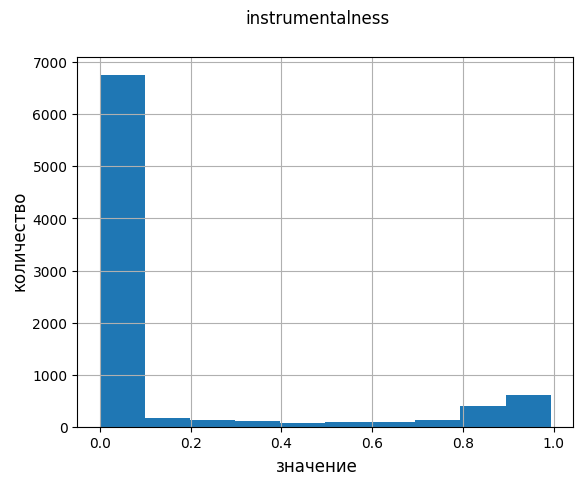

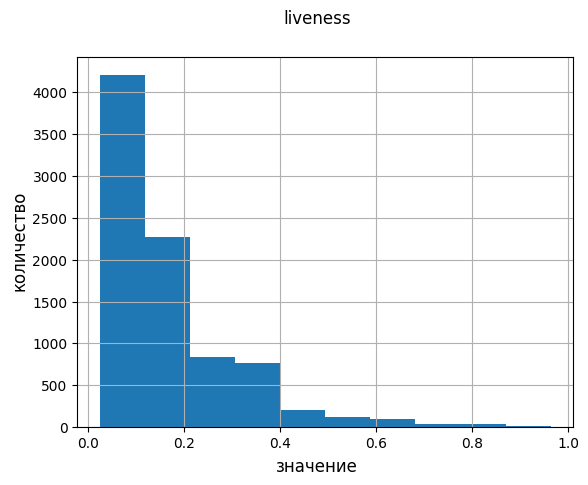

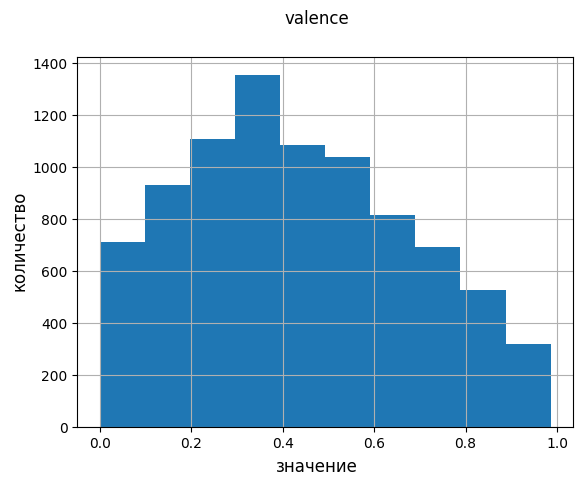

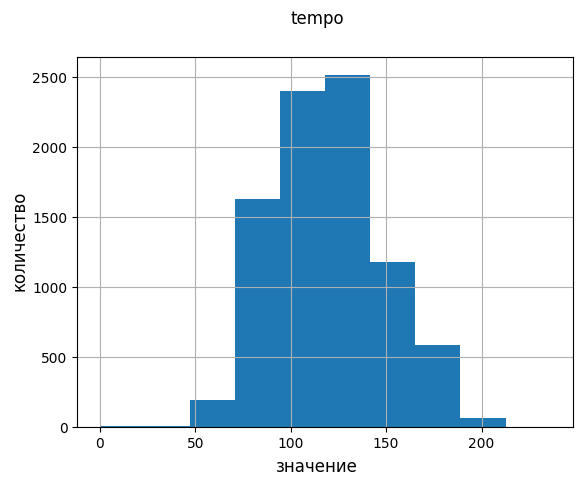

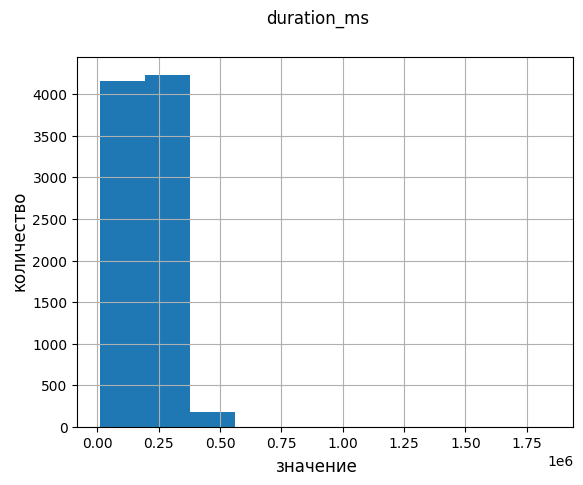

In [8]:

for attr in scalar_attributes:
    fig = plt.figure()
    fig.suptitle(attr.name)
    fig.supxlabel("значение")
    fig.supylabel("количество")
    attr.hist()
    

Выбросы будем определять по Z-оценке (Z-score < 2

In [9]:
from scipy import stats

for attr in scalar_attributes:
    clean_attr = attr[np.abs(stats.zscore(attr)) < 2]
    print(f"Количество строк с выбросами ({attr.name}): {len(attr)}")
    print(f"Количество строк без выбросов ({attr.name}): {len(clean_attr)}")
    print("\n")

Количество строк с выбросами (danceability): 8580
Количество строк без выбросов (danceability): 8162


Количество строк с выбросами (energy): 8580
Количество строк без выбросов (energy): 8262


Количество строк с выбросами (loudness): 8580
Количество строк без выбросов (loudness): 8146


Количество строк с выбросами (speechiness): 8580
Количество строк без выбросов (speechiness): 8086


Количество строк с выбросами (acousticness): 8580
Количество строк без выбросов (acousticness): 8580


Количество строк с выбросами (instrumentalness): 8580
Количество строк без выбросов (instrumentalness): 7520


Количество строк с выбросами (liveness): 8580
Количество строк без выбросов (liveness): 8168


Количество строк с выбросами (valence): 8580
Количество строк без выбросов (valence): 8398


Количество строк с выбросами (tempo): 8580
Количество строк без выбросов (tempo): 8268


Количество строк с выбросами (duration_ms): 8580
Количество строк без выбросов (duration_ms): 8236




### Определим корреляцию между атрибутами

Сперва построим матрицу графиков рассеивания

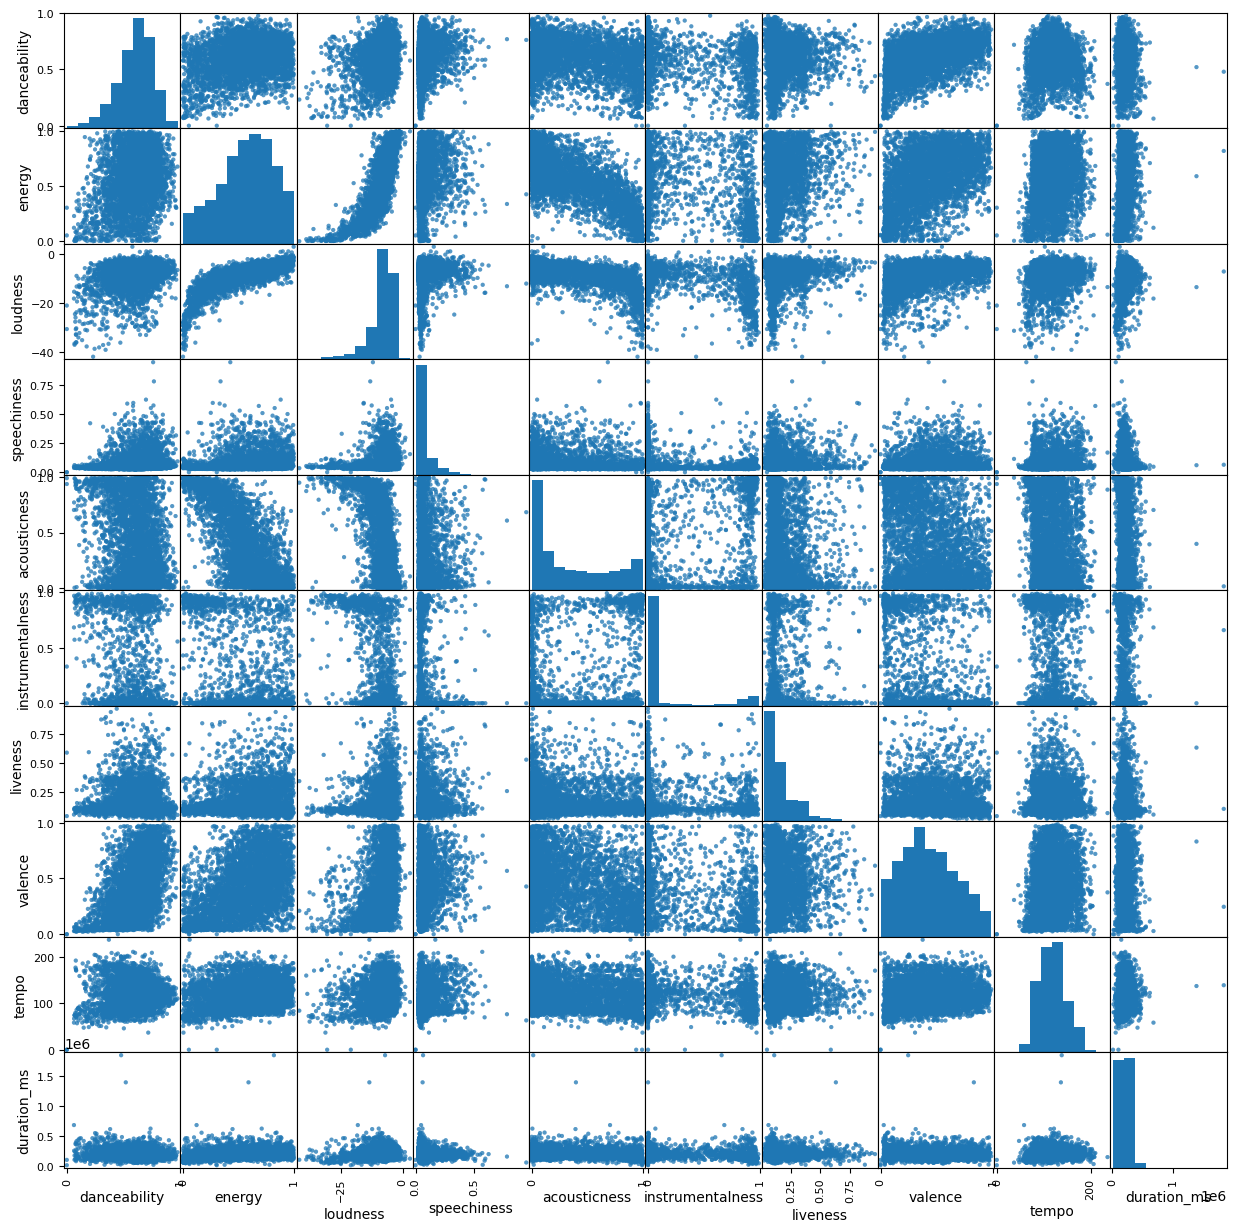

In [10]:
scatter_frame = pd.DataFrame({
    "danceability": scalar_attributes[0],
    "energy": scalar_attributes[1],
    "loudness": scalar_attributes[2],
    "speechiness": scalar_attributes[3],
    "acousticness": scalar_attributes[4],
    "instrumentalness": scalar_attributes[5],
    "liveness": scalar_attributes[6],
    "valence": scalar_attributes[7],
    "tempo": scalar_attributes[8],
    "duration_ms": scalar_attributes[9],
})

scatter_matrix = pd.plotting.scatter_matrix(
    scatter_frame,
    figsize=(15, 15) 
)

Теперь рассмотрим матрицу корреляций

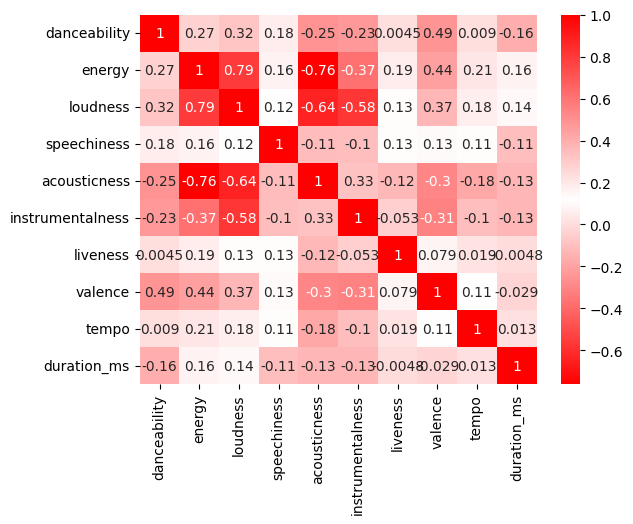

In [11]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('', ['red', 'white', 'red'])
heatmap = seaborn.heatmap(
    scatter_frame.corr(),
    annot=True,
    cmap=cmap
)

### Анализ корреляций

Высокая корреляция (0.6 < abs(corr) < 1):

- энергичность и громкость (0.79) - прямая корреляция: довольно закономерно, т.к. громкая музыка зачастую очень динамичная и заряжающая

- энергичность и акустичность (-0.76) - обратная корреляция: возможно, в данном датасете большинство энергичной музыки - электроника (дабстеп и т.п.)

- громкость и акустичность (-0.64) - обратная корреляция: возможно, большая часть акустической музыки в данном датасете действительно крайне спокойна (что соответствует предыдущему наблюдению)

Средняя корреляция (0.3 < abs(corr) < 0.6):

- инструментальность и громкость (-0.58) - обратная корреляция: данное наблюдение все так же подтверждает предположения, видвинутые ранее
  
- инструментальность и энергичность (-0.37) - обратная корреляция

- позитивность и танцевальность (0.49) - прямая корреляция

- позитивность и энергичность (0.44) - прямая корреляция

- позитивность и громкость (0.37) - прямая корреляция

- акустичность и инструментальность (0.33) - прямая корреляция

- позитивность и инструментальность (-0.31) - обратная корреляция

- позитивность и акустичность (-0.3) - обратная корреляция

Низкая корреляция (0,1 < abs(corr) < 0.3):

- танцевальность и энергичность (0.27) - прямая корреляция

- танцевальность и акустичность (-0.25) - обратная корреляция

- танцевальность и инструментальность (-0.23) - обратная корреляция

- длительность и танцевальность (-0.16) - обратная корреляция

- наличие речитатива и энергичность (0.16) - прямая корреляция 

- энергичность и ритм (0.21) - прямая корреляция 

- энергичность и длительность (0.16) - прямая корреляция 

Отсутствие корреляции (abs(corr) < 0.1):

- длительность и темп

- длительность и живой звук

- длительность и позитивность

- позитивность и живой звук

- ритм и живой звук

- ритм и танцевальность (что странно)